# 

# Redlining – Racism you can see from space

Redlining is a form of systemic racism that funnels resources away from
(typically) Black neighborhoods in the United States. Several mechanisms
contribute to the overall disinvestment, including requirements that
particular homeowners sell only to other white people, and labeling
Black neighborhoods as poor investments and thereby preventing anyone in
those neighborhoods from getting mortgages and other loans.

<figure>
<img
src="https://dsl.richmond.edu/panorama/redlining/static/images/decatur.jpg"
alt="Redlining map from Decatur, IL courtesy of Mapping Inequality (Nelson and Winling (2023))" />
<figcaption aria-hidden="true">Redlining map from Decatur, IL courtesy
of Mapping Inequality (<span class="citation"
data-cites="nelson_mapping_2023">Nelson and Winling
(2023)</span>)</figcaption>
</figure>

You can read more about redlining and data science in (Chapter 2 of Data
Feminism ( D’Ignazio and Klein 2020)).

In this case study, you will download satellite-based **multispectral**
data for the City of Denver, and compare that to redlining maps and
results from the U.S. Census American Community Survey.

D’Ignazio, Catherine, and Lauren Klein. 2020. “2. Collect, Analyze,
Imagine, Teach.” In *Data Feminism*.

Nelson, Robert K, and LaDale Winling. 2023. “Mapping Inequality:
Redlining in New Deal America.” In *American Panorama: An Atlas of
United States History*, edited by Robert K Nelson and Edward L. Ayers.
<https://dsl.richmond.edu/panorama/redlining.>

# STEP 1: Set up your analysis

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Import packages</div></div><div class="callout-body-container callout-body"><p>Add imports for packages that help you:</p>
<ol type="1">
<li>Work with the file system interoperably</li>
<li>Work with vector data</li>
<li>Create interactive plots of vector data</li>
</ol></div></div>

In [1]:
# Interoperable file paths
import os
# Find the home folder
import pathlib
# Work with vector data
import geopandas as gpd
# Interactive plots of vector data
import hvplot.pandas

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Prepare data directory</div></div><div class="callout-body-container callout-body"><p>In the cell below, <strong>reproducibly and interoperably</strong>
define and create a project data directory somewhere in your home
folder. Be careful not to save data files to your <code>git</code>
repository!</p></div></div>

In [2]:
# Define and create the project data directory
data_dir = os.path.join(
    pathlib.Path.home(),
    'earth-analytics',
    'data',
    'redlining'
)
os.makedirs(data_dir, exist_ok=True)

## STEP 2: Site map

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Define your study area</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Copy the <strong>geopackage</strong> URL for the <a
href="https://dsl.richmond.edu/panorama/redlining/data">University of
Richmond</a></li>
<li>Load the <em>vector</em> data into Python, making sure to cache the
download so you don’t have to run it multiple times.</li>
<li>Create a quick plot to check the data</li>
</ol></div></div>

/tmp/ipykernel_5848/89388881.py:12: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  redlining_gdf.to_file(redlining_path)
/opt/conda/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'city_survey' to 'city_surve'
  ogr_write(
/opt/conda/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'residential' to 'residentia'
  ogr_write(
/opt/conda/lib/python3.11/site-packages/pyogrio/raw.py:198: RuntimeWarning: /home/jovyan/earth-analytics/data/redlining/redlining/redlining.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


<Axes: >

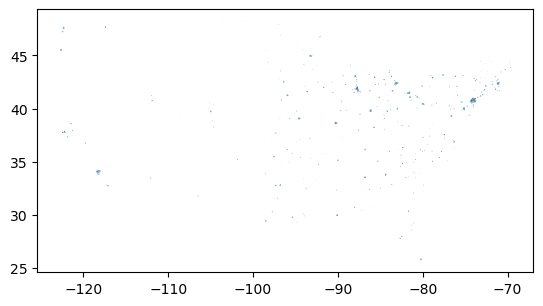

In [3]:
# Define info for redlining download
redlining_url = ("https://dsl.richmond.edu/panorama/"
                 "redlining/static/mappinginequality.gpkg")

redlining_dir = os.path.join(data_dir, 'redlining')
os.makedirs(redlining_dir, exist_ok=True)
redlining_path = os.path.join(redlining_dir, 'redlining.shp')

# Only download once
if not os.path.exists(redlining_path):
    redlining_gdf = gpd.read_file(redlining_url)
    redlining_gdf.to_file(redlining_path)

# Load from file
redlining_gdf = gpd.read_file(redlining_path)

# Check the data
redlining_gdf.plot()

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Create an interactive site map</div></div><div class="callout-body-container callout-body"><p>In the cell below:</p>
<ol type="1">
<li>Select only the data where the <code>city</code> column is equal to
<code>"Denver"</code>.</li>
<li>For now, dissolve the regions with the <code>.dissolve()</code>
method so we see only a map of Denver.</li>
<li>Plot the data with the <code>EsriImagery</code> tile source basemap.
Make sure we can see your basemap underneath!</li>
</ol></div></div>

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-respond"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Reflect and Respond: Write a site description</div></div><div class="callout-body-container callout-body"><p>Your site description should address:</p>
<ol type="1">
<li>Is there anything relevant to this analysis that you notice in your
site map?</li>
<li>Research about the <strong>context</strong> of this analysis. You
could include information about the climate and history of the Denver
area. How might racism, water rights, or other societal forces have
influenced the distribution of urban green space in Denver? Aim for a
paragraph of text.</li>
<li>Citations for the site data and your context sources.</li>
</ol></div></div>

In [4]:
# Create an interactive map of Denver redlining boundary

# Select out Denver, CO from redlining_gdf 
denver_redlining_gdf = redlining_gdf[redlining_gdf.city=='Denver']
denver_redlining_gdf

# Plot undissolved denver_redlining_gdf with pandas
#denver_redlining_gdf.plot(column='category', legend=True)

# Dissolve into a single polygon
denver_dissolved = denver_redlining_gdf.dissolve()

# Make interactive plot using hvplot
denver_redlining_gdf.hvplot(geo=True,
                        tiles='EsriImagery',
                        line_color='white',
                        fill_color='None',
                        line_width=3,
                        frame_width=600,
                        title='City of Denver and \nRedlining boundaries (1940)')

/opt/conda/lib/python3.11/site-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]

YOUR SITE DESCRIPTION HERE

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Store variables</div></div><div class="callout-body-container callout-body"><p>Store any variables you want for later. This should definitely
include your un-dissolved denver redlining <code>GeoDataFrame</code> and
your data directory path.</p></div></div>

In [5]:
%store denver_redlining_gdf data_dir

Stored 'denver_redlining_gdf' (GeoDataFrame)
Stored 'data_dir' (str)


In [6]:
%%capture
%%bash
jupyter nbconvert redlining-all-notebooks.ipynb --to html